<a href="https://colab.research.google.com/github/raibafarhan2002/Sem7_ML/blob/main/MLexp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))




In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("/content/HousingData.csv")

In [11]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [13]:
data.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [15]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [16]:
data.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [17]:
dataset=data.dropna()

In [18]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

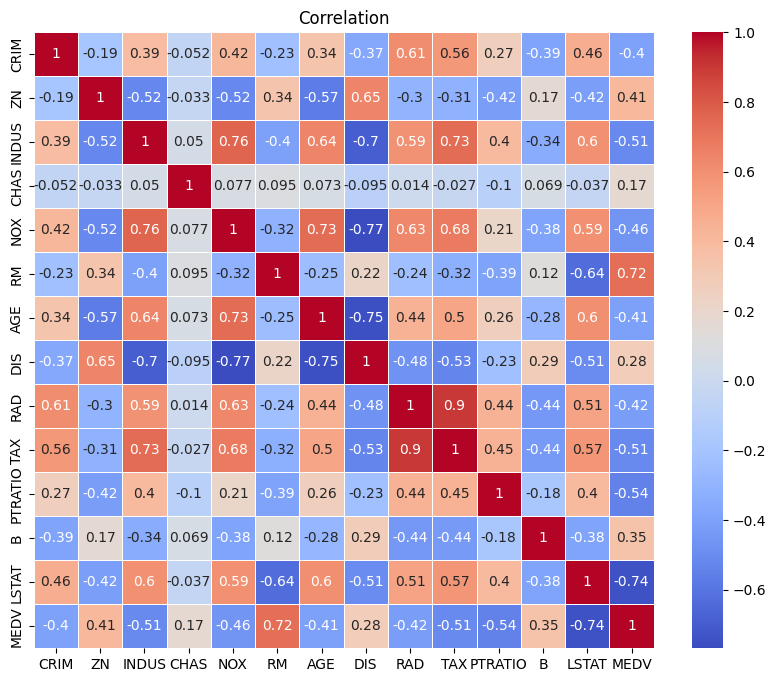

In [22]:
import seaborn as sns

correlation_matrix = dataset.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation')
plt.show()

In [23]:
x=dataset.drop('MEDV',axis=1)
y=dataset.MEDV

In [24]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


In [25]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
5    28.7
Name: MEDV, dtype: float64

In [26]:
# Train Test split
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=42)

In [28]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
21,0.85204,0.0,8.14,0.0,0.538,5.965,89.2,4.0123,4,307,21.0,392.53,13.83
456,4.66883,0.0,18.10,0.0,0.713,5.976,87.9,2.5806,24,666,20.2,10.48,19.01
28,0.77299,0.0,8.14,0.0,0.538,6.495,94.4,4.4547,4,307,21.0,387.94,12.80
156,2.44668,0.0,19.58,0.0,0.871,5.272,94.0,1.7364,5,403,14.7,88.63,16.14
445,10.67180,0.0,18.10,0.0,0.740,6.459,94.8,1.9879,24,666,20.2,43.06,23.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.05059,0.0,4.49,0.0,0.449,6.389,48.0,4.7794,3,247,18.5,396.90,9.62
128,0.32543,0.0,21.89,0.0,0.624,6.431,98.8,1.8125,4,437,21.2,396.90,15.39
345,0.03113,0.0,4.39,0.0,0.442,6.014,48.5,8.0136,3,352,18.8,385.64,10.53
448,9.32909,0.0,18.10,0.0,0.713,6.185,98.7,2.2616,24,666,20.2,396.90,18.13


In [29]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
93,0.02875,28.0,15.04,0.0,0.464,6.211,28.9,3.6659,4,270,18.2,396.33,6.21
352,0.07244,60.0,1.69,0.0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79
319,0.47547,0.0,9.90,0.0,0.544,6.113,58.8,4.0019,4,304,18.4,396.23,12.73
65,0.03584,80.0,3.37,0.0,0.398,6.290,17.8,6.6115,4,337,16.1,396.90,4.67
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,5.20177,0.0,18.10,1.0,0.770,6.127,83.4,2.7227,24,666,20.2,395.43,11.48
457,8.20058,0.0,18.10,0.0,0.713,5.936,80.3,2.7792,24,666,20.2,3.50,16.94
321,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
190,0.09068,45.0,3.44,0.0,0.437,6.951,21.5,6.4798,5,398,15.2,377.68,5.10


In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [31]:
x_train=scaler.fit_transform(x_train)

In [32]:
x_test=scaler.transform(x_test)

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
regression=LinearRegression(fit_intercept=True, copy_X=True, n_jobs=None, positive=False)

In [35]:
regression.fit(x_train,y_train)

LinearRegression()

In [36]:
reg_pred=regression.predict(x_test)

In [37]:
reg_pred

array([29.48758967, 16.89843072, 21.88395113, 30.03140416, 18.33998157,
       34.41717332, 22.29567579, 30.18541478, 32.68800811, 15.15148614,
       22.00937236, 40.89756783, 21.39760824, 16.631487  , 18.56021823,
       20.16135634, 17.03230083, 15.23458095, 22.21007405, 14.03864948,
       18.38308584, 20.31978106, 16.70540425, 29.04732153, 25.84896274,
       16.21750987, 26.91521769, 31.48625718, 23.80195772, 26.88649048,
       40.79205858, 17.93939578, 21.74000234, 17.0218407 , 17.45215081,
       20.87478891, 22.15708989, 21.38558618, 23.05850448, 21.06608939,
       27.72449001, 34.81400202, 21.78651421, 30.44288708, 34.59722541,
       19.75813031, 24.68728038, 10.22457273, 19.81849411, 25.15817576,
       21.82205121, 25.58520471, 14.76531893, 18.31754995, 18.17045495,
       23.96198129, 43.37418034, 22.39050206, 15.68056608, 23.22677962,
       20.98939499, 21.55059106, 14.59407927, 28.87042011, -3.45096729,
       32.51557282, 16.5500498 , 31.10947226, 24.8731608 , 20.17

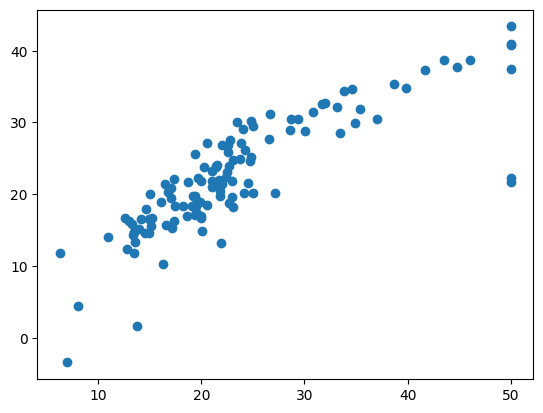

In [38]:
plt.scatter(y_test,reg_pred)

In [39]:
residual=y_test-reg_pred

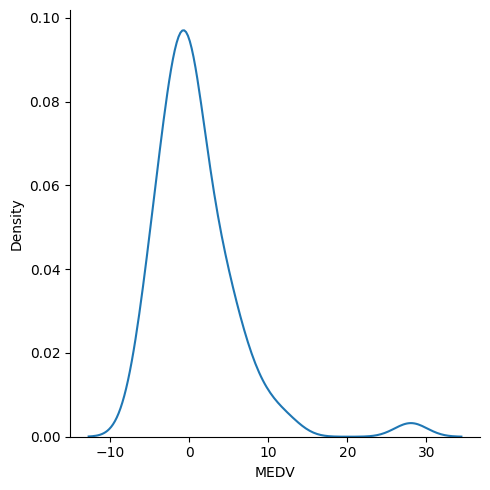

In [40]:
sns.displot(residual,kind='kde')

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [42]:
print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))

28.870771928253443
3.4558210072479936


In [43]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)

In [44]:
print(score)

0.6905175764205996


In [45]:
data=dataset.drop("MEDV",axis=1)

In [46]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


In [47]:
data=scaler.transform(data)

In [48]:
data

array([[-0.40933976,  0.27402606, -1.27968808, ..., -1.52711029,
         0.44817157, -1.07231454],
       [-0.40730263, -0.48865541, -0.57792953, ..., -0.36108594,
         0.44817157, -0.51376907],
       [-0.40730457, -0.48865541, -0.57792953, ..., -0.36108594,
         0.40599731, -1.19986699],
       ...,
       [-0.40555957, -0.48865541,  0.13857185, ...,  1.13142523,
         0.44817157, -0.52182501],
       [-0.40405623, -0.48865541,  0.13857185, ...,  1.13142523,
         0.44817157, -0.98369915],
       [-0.39931715, -0.48865541,  0.13857185, ...,  1.13142523,
         0.41242189, -0.87091593]])

In [49]:
new=data[0]

In [50]:
new=new.reshape(1,-1)

In [51]:
new.shape

(1, 13)

In [52]:
regression.predict(new)

array([29.04732153])